# Context

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

In [3]:
data_1 = pd.read_csv('train.csv')

In [4]:
data_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data quality assessment

In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


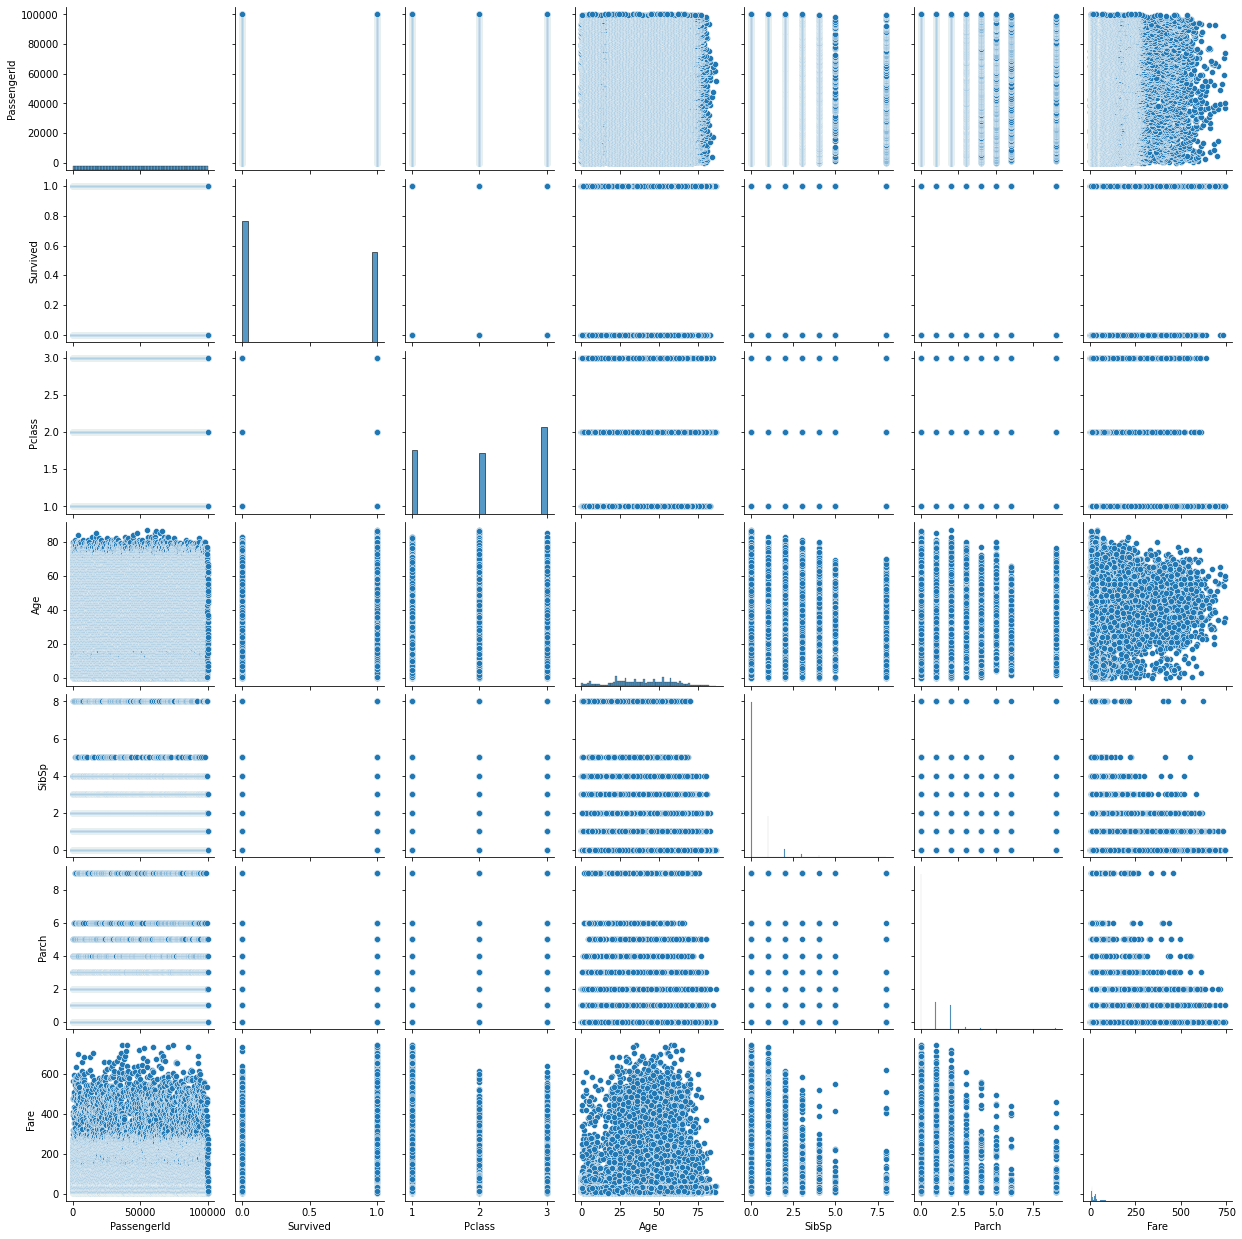

In [6]:
"""snc.displot(data_1['Age'])
snc.displot(data_1['Pclass'], bins=3)"""


# В общем
sns.pairplot(data_1)

# Далее работа с наиболее интересными

# Data exploration

"""
survival	Survival          0 = No, 1 = Yes
pclass	Ticket class          1 = 1st, 2 = 2nd, 3 = 3rd
sex                           Sex	                      ////
Age                           Age in years              ////
sibsp                         # of siblings / spouses aboard the Titanic	
parch                         # of parents / children aboard the Titanic	
ticket                        Ticket number         ////
fare                          Passenger fare	
cabin                         Cabin number	
embarked                      Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


возраст: Возраст дробный, если меньше 1. Если возраст оценивается, он в форме xx.5

sibsp: Набор данных определяет семейные отношения таким образом...
Брат, сестра, сводный брат, сводная сестра
Супруг = муж, жена (любовницы и женихи были проигнорированы)

parch: Набор данных определяет семейные отношения таким образом...
Родитель = мать, отец
Ребенок = дочь, сын, падчерица, пасынок
Некоторые дети путешествовали только с няней, поэтому parch=0 для них.
"""

In [9]:
# Number of passengers in each class
data_1.groupby('Pclass')['Pclass'].count()

Pclass
1    30315
2    28679
3    41006
Name: Pclass, dtype: int64

In [10]:
# Number of men and women in each of the passenger class
data_1.groupby(['Sex', 'Pclass'])['Sex'].count()

Sex     Pclass
female  1         16084
        2         15283
        3         12519
male    1         14231
        2         13396
        3         28487
Name: Sex, dtype: int64

In [11]:
# счет женщин и мужчин
guy=0
women=0
for index, row in data_1.iterrows(): 
    row[4]=str(row[4])
    if row[4]== "male":
        guy=guy+1
    else:
        women=women+1
print(guy,',',women) #males / females

56114 , 43886


In [12]:
# счет выживших
servived=0
non_servived=0
doly=0
for index, row in data_1.iterrows(): 
    row[1]=str(row[1])
    if row[1]== "1":
        servived=servived+1
    else:
        non_servived=non_servived+1
sum=servived+non_servived      
percent=round((servived*100)/sum)
print('Survived percent:', percent) 

Survived percent: 43


In [13]:
# счетт пассажиров различного класса
class1=0
class2=0
class3=0
class4=0
sum=0
doly=0

for index, row in data_1.iterrows(): 
    row[2]=str(row[2])
    
    if row[2]== "1":
        class1=class1+1 
    if row[2]== "2":
        class2=class2+1
    if row[2]== "3":
        class3=class3+1
    if row[2]== "4":
        class4=class4+1
    
sum=class1+class2+class3+class4
doly_1= round(class1*(100/sum),2)
print('Доля первого класса:', doly_1)  #доля первого класса
doly_2= round(class2*(100/sum),2)
print('Доля второго класса:', doly_2)  #доля второго класса
doly_3= round(class3*(100/sum),2)
print('Доля третьего класса:', doly_3)  #доля третьего класса


max_fare = data_1["Fare"].max()
print('Максимальная цена за билет:', max_fare)

Доля первого класса: 30.32
Доля второго класса: 28.68
Доля третьего класса: 41.01
Максимальная цена за билет: 744.66


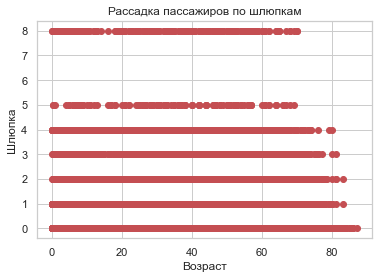

Выжило =  42.774 % Кол-во 42774
Не выжило =  57.226 % Кол-во 57226


In [19]:
survived=0
notsurvived=0
import matplotlib
from matplotlib.lines import Line2D 

data_2 = pd.read_csv('train.csv')
for index, row in data_1.iterrows(): 
    
    plt.plot(row[5], row[6], 'ro')
    
    row[1]=str(row[1])
    if row[1]== "1":
        survived=survived+1
    else:
        notsurvived=notsurvived+1
        
plt.grid(True)
plt.xlabel(u'Возраст')
plt.ylabel(u'Шлюпка')
plt.title(u'Рассадка пассажиров по шлюпкам')
plt.show()
sum=survived+notsurvived      
percent1=((survived*100)/sum)
percent2=100-percent1
print("Выжило = ",percent1,"%", "Кол-во", survived)
print("Не выжило = ",percent2,"%", "Кол-во",notsurvived)

In [17]:
b=data_1['Age'].mean()  #среднее
m=data_1['Age'].median()   #медиана
# print(round(b,2), m)
print('Среднее значение:', round(b,4))
print('Медиана:', m)

Среднее значение: 38.3555
Медиана: 39.0


In [18]:
# Number of passengers who survived in each class grouped by sex. Also total was found for each class grouped by sex

data_1.pivot_table('Survived', 'Sex', 'Pclass',
                   aggfunc=np.sum,
                   margins=True)

Pclass,1,2,3,All
Sex,,,,
female,12357,11753,7116,31226
male,5219,3304,3025,11548
All,17576,15057,10141,42774


p:\python projects\ai_curces\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
p:\python projects\ai_curces\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


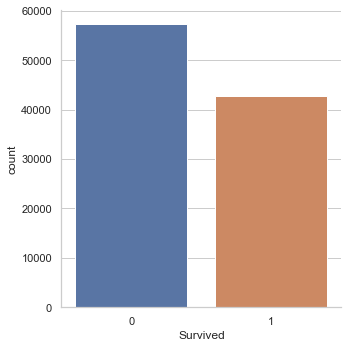

In [20]:
not_survived = data_1[data_1['Survived']==0]


# Factor plot of those who survived vs. who didn't
sns.factorplot('Survived', data=data_1, kind='count')

In [21]:
# Total number of passengers who didn't survive 
len(not_survived)


# Number of passengers who did not survive in each class grouped by sex.
not_survived.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=len, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,3727,3530,5403,12660
male,9012,10092,25462,44566
All,12739,13622,30865,57226


In [24]:
import pandas as pd
# Пассажиры которые выжили и не выжили сгруппированный по классу и полу
table_1 = pd.crosstab(index=[data_1['Survived'], data_1['Pclass']], columns=[data_1.Sex,data_1.Embarked])

# C = Cherbourg, Q = Queenstown, S = Southampton
table_1.unstack()

Sex      female                                                male       \
Embarked      C                 Q               S                 C        
Pclass        1     2     3     1    2    3     1     2     3     1    2   
Survived                                                                   
0          1141   578   701   894  125  144  1683  2820  4545  1536  557   
1          6903  4430  2033  1946  469  274  3461  6819  4789  2263  591   

Sex                                               
Embarked          Q               S               
Pclass       3    1    2    3     1     2      3  
Survived                                          
0         1005  504  167  352  6953  9345  24048  
1          449  407   83   59  2538  2625   2513

In [25]:
data_1['Parch'].dtype, data_1['SibSp'].dtype, len(data_1.Cabin.dropna())




# Create a function to define those who are children (less than 16)
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex


data_1['person'] = data_1[['Age', 'Sex']].apply(male_female_child, axis=1)

# Lets have a look at the first 10 rows of the data frame
data_1[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,male
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,male
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,child
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,male
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,male
5,5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S,male
6,6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S,child
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S,child
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S,male
9,9,0,2,"Greigo, Rudy",male,66.00,0,0,6981,9.14,D2969,C,male


In [28]:
# Count number of men, women and children
data_1['person'].value_counts()

male      51303
female    37571
child     11126
Name: person, dtype: int64

In [31]:
# Провевряем в каких каютах находилесь пассажиры
df = data_1
deck = df['Cabin'].dropna()
deck.head()


# Grab the first letter of the cabin letter
d = []
for c in deck:
    d.append(c[0])
d[0:10]


from collections import Counter
Counter(d)


Counter({'C': 11825,
         'A': 6307,
         'D': 3637,
         'B': 7439,
         'E': 1749,
         'F': 663,
         'G': 482,
         'T': 32})

In [40]:
# Почему бы не узнать кто был одинок на корабле)

# Alone dataframe i.e. the passenger has no siblings or parents
df_alone = df[(df['SibSp'] == 0) & (df['Parch']==0)]

# Add Alone column
df_alone['Alone'] = 'Alone'

# Not alone data frame i.e. the passenger has either a sibling or a parent.
df_not_alone = df[(df['SibSp'] != 0) | (df['Parch']!=0)]
df_not_alone['Alone'] = 'With family'

# Merge the above dataframes
comb = [df_alone, df_not_alone]
# Merge and sort by index
df = pd.concat(comb).sort_index()


alone_or_not_alone = [len(df_alone), len(df_not_alone)]
alone_or_not_alone


# Show the first five records of the alone data frame
df_alone.head()

C:\Users\Сергей\AppData\Local\Temp\ipykernel_20076\1026639351.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alone['Alone'] = 'Alone'
C:\Users\Сергей\AppData\Local\Temp\ipykernel_20076\1026639351.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_alone['Alone'] = 'With family'


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,male,Alone
3,3,0,3,"Kramer, James",male,19.0,0,0,A. 10866,13.04,NaN,S,male,Alone
4,4,1,3,"Bond, Michael",male,25.0,0,0,427635,7.76,NaN,S,male,Alone
5,5,0,2,"Sassano, Jonathan",male,35.0,0,0,13363,6.71,NaN,S,male,Alone
6,6,0,3,"Conway, Jose",male,7.0,0,0,A/5,9.77,NaN,S,child,Alone


In [41]:
# Посмотрим кто первым был не одиноким
# Show the first five rows of the not alone data frame

df_not_alone.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,male,With family
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,child,With family
7,7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S,child,With family
8,8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S,male,With family
14,14,1,1,"Seaton, Karen",female,44.00,0,1,12425,28.40,D6945,C,female,With family


In [44]:
# Посмотрим от чего зависило выживание на корабле

'''Теперь давайте посмотрим на факторы, которые помогают кому-то выжить при затоплении.
Мы начинаем этот анализ с добавления нового cloumn в фрейм данных.
Используем столбец «Выживший» для сопоставления с новым столбцом с коэффициентами 0: нет и 1: да.
'''
df['Survivor'] = df.Survived.map({0:'no', 1:'yes'})

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,male,With family,yes
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,male,Alone,no
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,child,With family,no
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,male,Alone,no
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,male,Alone,yes


# Summary

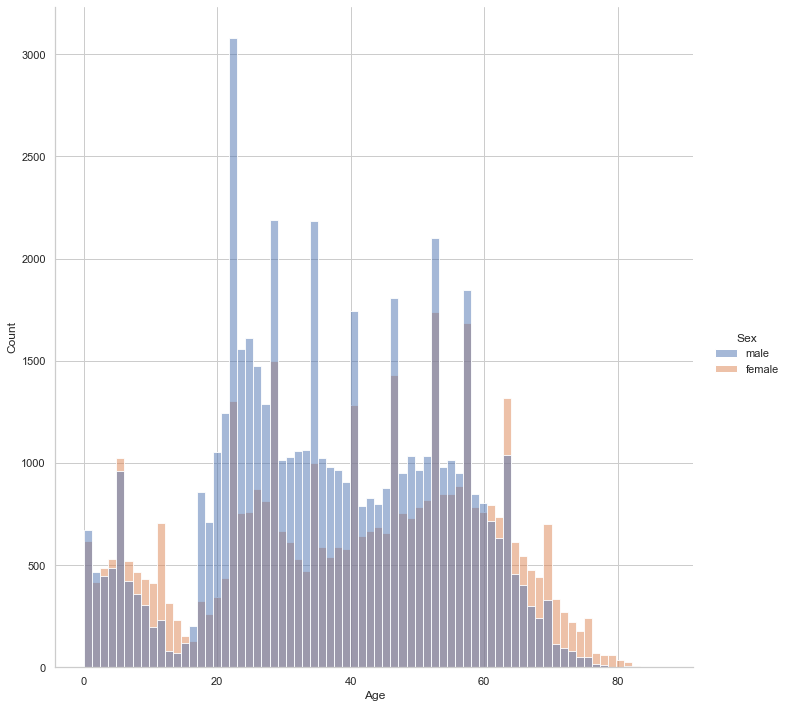

In [48]:
dsp = sns.displot(data=data_1, x='Age', hue='Sex', height=10)

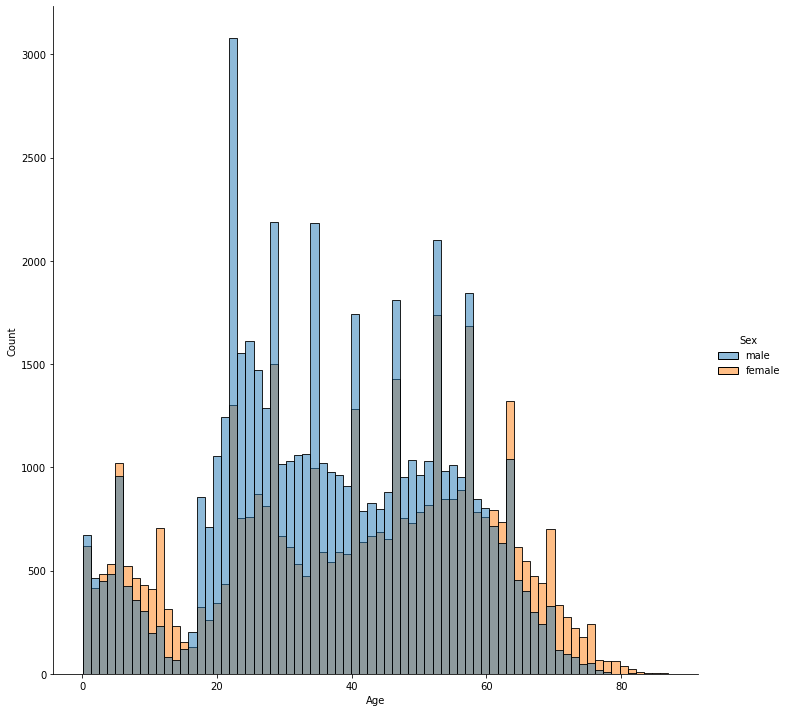

In [7]:
dsp = sns.displot(data=data_1, x='Age', hue='Sex', height=10)

p:\python projects\ai_curces\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
p:\python projects\ai_curces\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


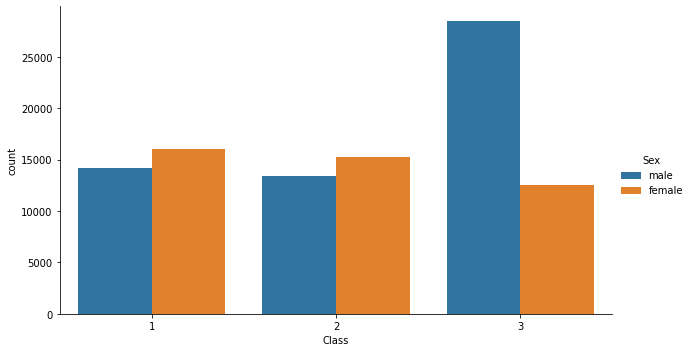

In [8]:
fg = sns.factorplot('Pclass', data=data_1, kind='count', aspect=1.75, hue='Sex')
fg.set_xlabels('Class')
# Распределение класса от колличества с учетом пола

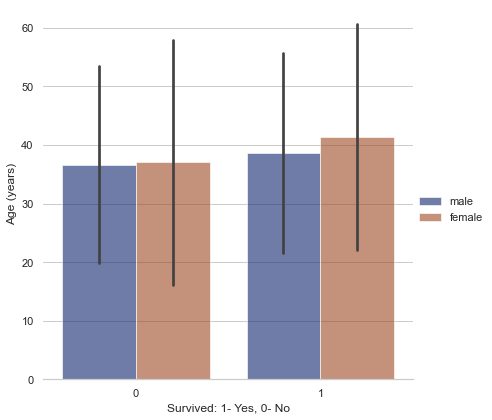

In [14]:
# Счет женщин и мужчин
# Строим график
sns.set_theme(style="whitegrid")

penguins = data_1

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="Survived", y="Age", hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Survived: 1- Yes, 0- No", "Age (years)")
g.legend.set_title("")

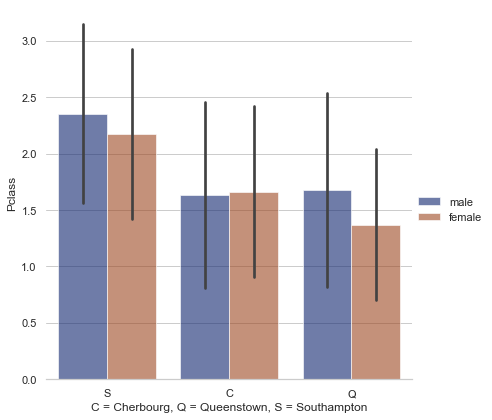

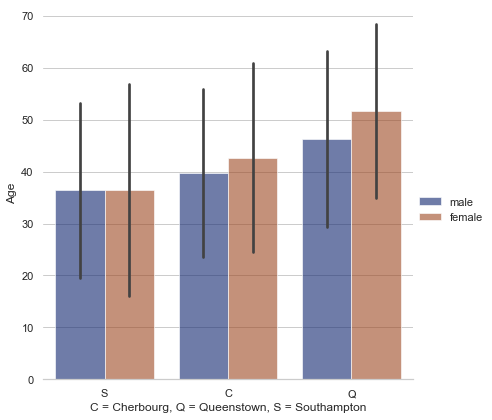

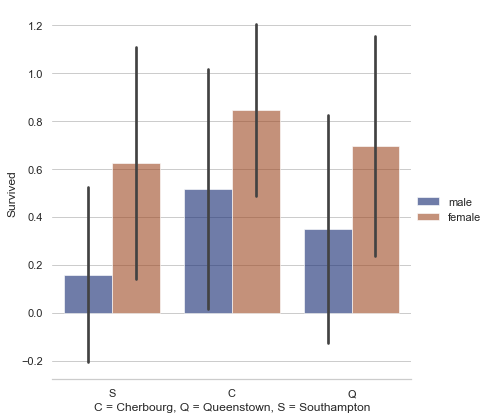

In [47]:
# Строим график
sns.set_theme(style="whitegrid")

data = data_1

# Draw a nested barplot by species(Pclass) and sex
g = sns.catplot(
    data=data, kind="bar",
    x="Embarked", y='Pclass', hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("C = Cherbourg, Q = Queenstown, S = Southampton")
g.legend.set_title("")
#___________________________________________________________________________


sns.set_theme(style="whitegrid")

data = data_1

# Draw a nested barplot by Age and sex
g = sns.catplot(
    data=data, kind="bar",
    x="Embarked", y='Age', hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("C = Cherbourg, Q = Queenstown, S = Southampton")
g.legend.set_title("")

#_____________________________________________________________________________
sns.set_theme(style="whitegrid")

data = data_1

# Draw a nested barplot by Survived and sex
g = sns.catplot(
    data=data, kind="bar",
    x="Embarked", y='Survived', hue="Sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("C = Cherbourg, Q = Queenstown, S = Southampton")
g.legend.set_title("")

Average and median age of passengers are 38 and 39 years old, respectively


p:\python projects\ai_curces\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Distribution of Passengers' Ages")

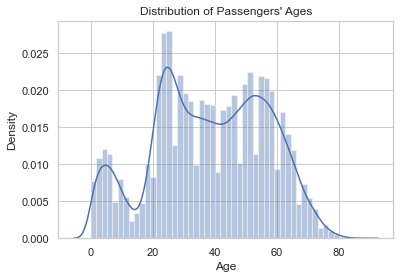

In [23]:
print('Average and median age of passengers are %0.f and %0.f years old, respectively'%(data['Age'].mean(), 
                                                                                        data['Age'].median()))


data['Age'].describe()


# Drop missing values for the records in which age passenger is missing
age = data['Age'].dropna()


# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

p:\python projects\ai_curces\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
p:\python projects\ai_curces\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


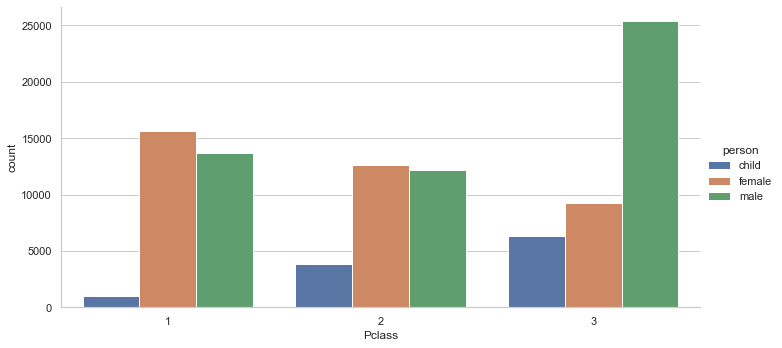

In [27]:
# Lets do a factorplot of passengers splitted into sex, children and class
sns.factorplot('Pclass',
               data=data_1,
               kind='count',
               hue='person',
               order=[1,2,3], 
               hue_order=['child','female','male'],
               aspect=2)

p:\python projects\ai_curces\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
p:\python projects\ai_curces\venv\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
p:\python projects\ai_curces\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


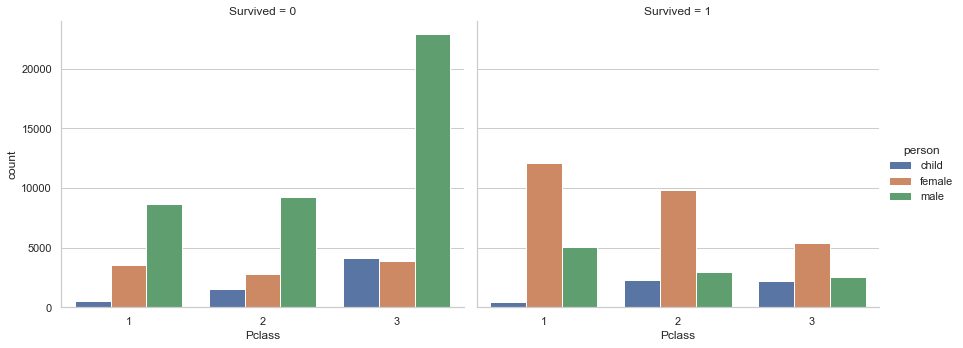

In [29]:
# Do the same as above, but split the passengers into either survived or not
sns.factorplot('Pclass', data=data_1,
               kind='count',
               hue='person',
               col='Survived',
               order=[1,2,3], 
               hue_order=['child','female','male'],
               aspect=1.25, size=5)

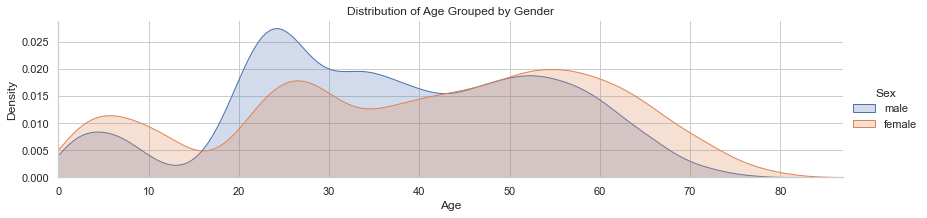

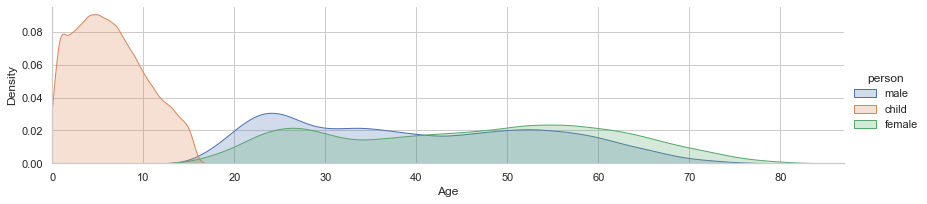

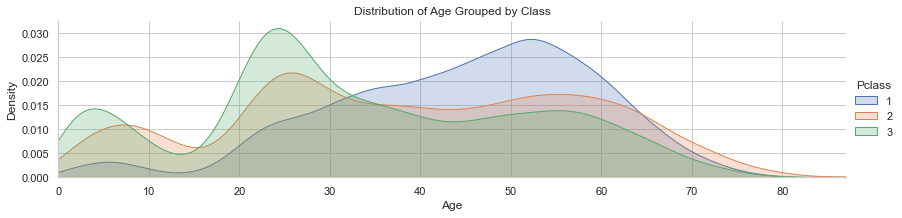

In [30]:
# Grouped by Gender

plot_1 = sns.FacetGrid(data_1, hue='Sex', aspect=4)

plot_1.map(sns.kdeplot, 'Age', shade=True)

oldest = data_1['Age'].max()

plot_1.set(xlim=(0,oldest))
plot_1.set(title='Distribution of Age Grouped by Gender')
plot_1.add_legend()

#--------------------------------------------------------

plot_2 = sns.FacetGrid(data_1, hue='person', aspect=4)

plot_2.map(sns.kdeplot, 'Age', shade=True)

oldest = data_1['Age'].max()

plot_2.set(xlim=(0,oldest))
plot_2.add_legend()

# Grouped by Class
#--------------------------------------------------------

plot_3 = sns.FacetGrid(data_1, hue='Pclass', aspect=4)

plot_3.map(sns.kdeplot, 'Age', shade=True)

oldest = data_1['Age'].max()

plot_3.set(xlim=(0,oldest))
plot_3.set(title='Distribution of Age Grouped by Class')
plot_3.add_legend()

p:\python projects\ai_curces\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
p:\python projects\ai_curces\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
p:\python projects\ai_curces\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

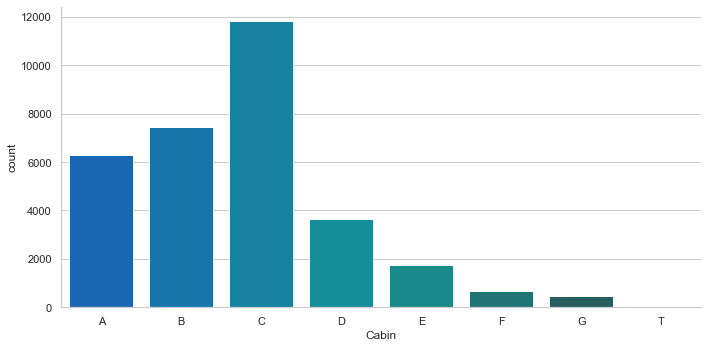

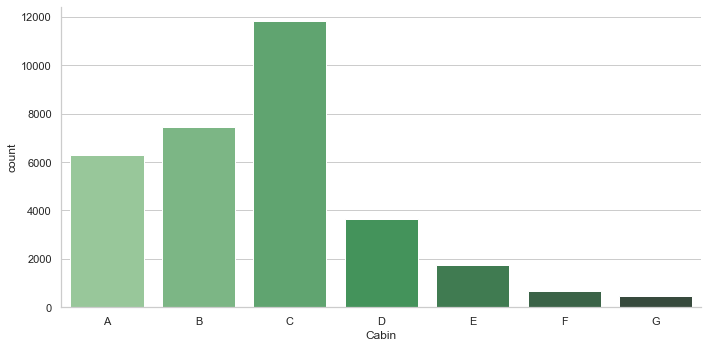

In [32]:
# Now lets factorplot the cabins. First transfer the d list into a data frame. Then rename the column Cabin 
df_cab = pd.DataFrame(d)

df_cab.columns=['Cabin']

sns.factorplot('Cabin',
               data=df_cab,
               kind='count',
               order=['A','B','C','D','E','F','G','T'],
               aspect=2,
               palette='winter_d')

#---------------------------------------------------------------------------------------------------------------------

# Убираем кабину 'T'

df_cab = df_cab[df_cab['Cabin'] != 'T']

# Then replot the Cabins factorplot as above
sns.factorplot('Cabin',
               data=df_cab,
               kind='count',
               order=['A','B','C','D','E','F','G'],
               aspect=2,
               palette='Greens_d')


p:\python projects\ai_curces\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
p:\python projects\ai_curces\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


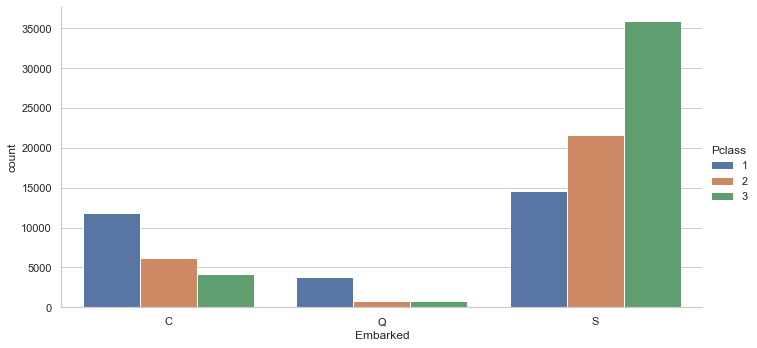

In [37]:
# Узнаем откуда прибыли пассажиры

sns.factorplot('Embarked',
               data=df,
               kind='count',
               hue='Pclass',
               hue_order=range(1,4),
               aspect=2,
               order = ['C','Q','S'])

#-------------------------------------

df.Embarked.value_counts()

# Узнаем откуда прибыли пассажиры
# For tabulated values, use crosstab pandas method instead of the factorplot in seaborn
port = pd.crosstab(index=[df.Pclass], 
                   columns=[df.Embarked])
port.columns = [['Cherbourg','Queenstown','Southampton']]

In [38]:
port

,Cherbourg,Queenstown,Southampton
Pclass,,,
1,11843,3751,14635
2,6156,844,21609
3,4188,829,35895


In [39]:
port.index

port.columns

port.index=[['First','Second','Third']]

port

,Cherbourg,Queenstown,Southampton
First,11843,3751,14635
Second,6156,844,21609
Third,4188,829,35895


C:\Users\Сергей\AppData\Local\Temp\ipykernel_20076\20772244.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alone'].loc[df['Alone']>0] = 'With family'
p:\python projects\ai_curces\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
p:\python projects\ai_curces\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

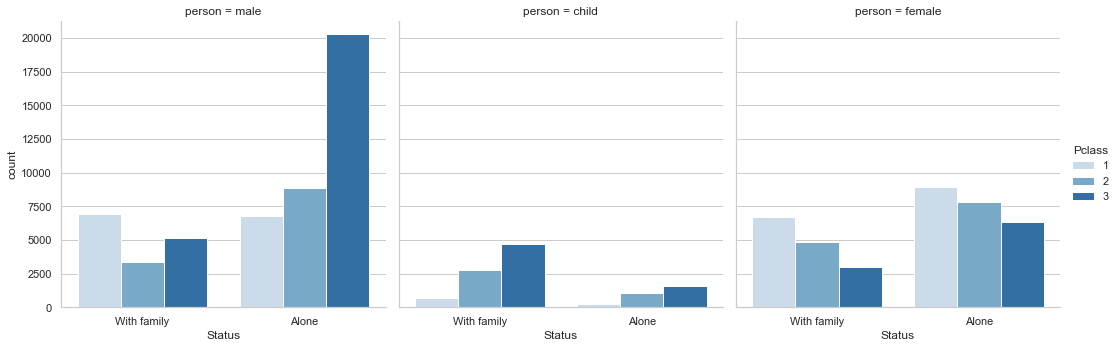

In [43]:
# Who was alone on the ship?
# Покажем это в графическом виде
# Another way to perform the above
df['Alone'] = df.SibSp + df.Parch

df['Alone'].loc[df['Alone']>0] = 'With family'
df['Alone'].loc[df['Alone']==0] = 'Alone'





fg=sns.factorplot('Alone', data=df,
                  kind='count',
                  hue='Pclass',
                  col='person',
                  hue_order=range(1,4),
                  palette='Blues')
fg.set_xlabels('Status')

p:\python projects\ai_curces\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
p:\python projects\ai_curces\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
p:\python projects\ai_curces\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplo

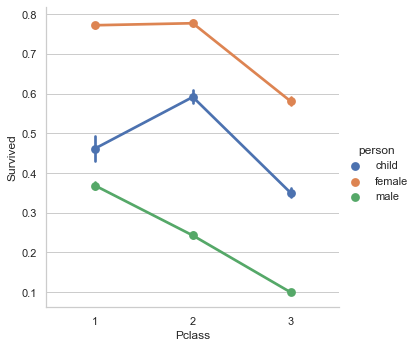

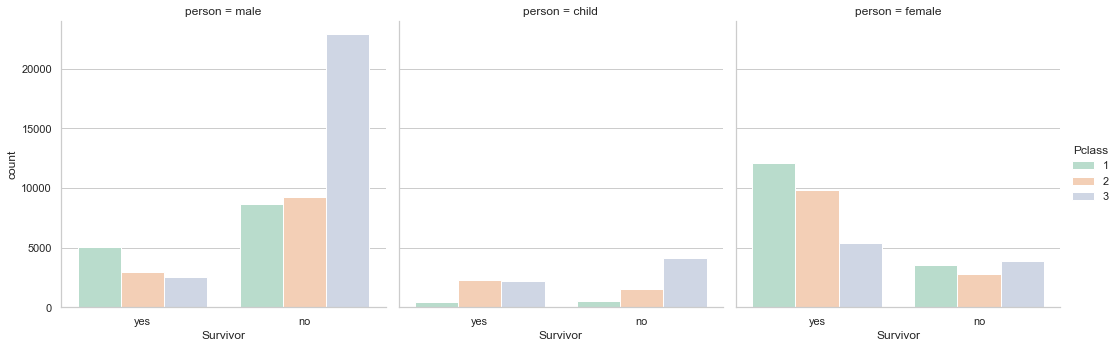

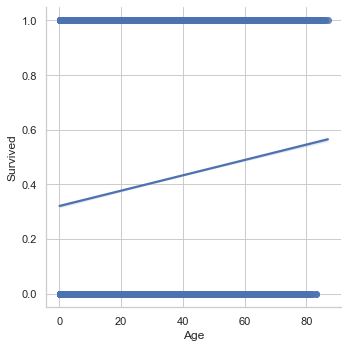

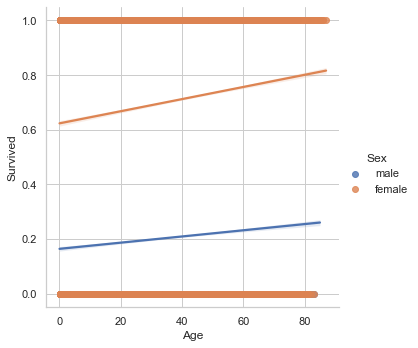

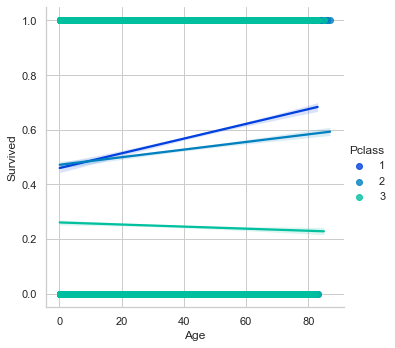

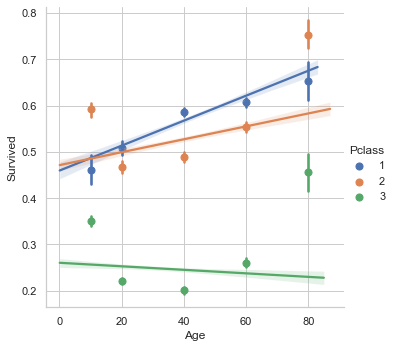

In [45]:
# Survived vs. class Grouped by gender
sns.factorplot('Pclass',
               'Survived',
               hue='person',
               data=df,
               order=range(1,4), 
               hue_order = ['child','female','male'])

#----------------------------------------------------

sns.factorplot('Survivor',
               data=df,
               hue='Pclass',
               kind='count',
               palette='Pastel2',
               hue_order=range(1,4),
               col='person')

#----------------------------------------------------

# Linear plot of age vs. survived
sns.lmplot('Age',
           'Survived',
           data=df)

#---------------------------------------------------

# Survived vs. Age grouped by Sex
sns.lmplot('Age',
           'Survived',
           data=df,
           hue='Sex')

#---------------------------------------------------

# Survived vs. Age gruped by class
sns.lmplot('Age',
           'Survived',
           hue='Pclass',
           data=df,
           palette='winter',
           hue_order=range(1,4))

#---------------------------------------------------

# Create a generation bin
generations = [10,20,40,60,80]
sns.lmplot('Age',
           'Survived', 
           hue='Pclass', 
           data=df,
           x_bins=generations,
           hue_order=[1,2,3])